In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#import time
#%matplotlib auto
#%matplotlib inline

Parameters

In [17]:
a = 0
b = 100

kappa = 2
T = 5

This is needed for implicit Scheme

In [18]:
# this is needed for implicit Scheme
def setUpDiagonals(N):
    
    # lower, diag, upper
    l = np.zeros((N,1))
    d = np.zeros((N,1))
    u = np.zeros((N,1))
    
    for i in range(N):
        l[i] = -rho
        d[i] = 1 + 2*rho
        u[i] = -rho
        
        
    return l, d, u


Tri-diagonal solver for implicit scheme

In [19]:
# Tri-diagonal solver for implicit scheme
def diagSolver(l, d, u, b):
    
    '''
    tri-diagonal solver
    '''
    N = len(d)
    lL, dD, uU, bB = map(np.array, (l, d, u, b)) # copy arrays
    for i in range(1, N):
        tmp = lL[i-1]/dD[i-1]
        dD[i] = dD[i] - tmp*uU[i-1] 
        bB[i] = bB[i] - tmp*bB[i-1]
       
    x = dD
    x[-1] = bB[-1]/dD[-1]

    for il in range(N-2, -1, -1):
        x[il] = (bB[il]-uU[il]*x[il+1])/dD[il]

    return x

Stiffness matrix -- needed for explicit scheme

In [20]:
def formTheMatrix(N):
    
    A = np.zeros((N,N))
    
    for i in range(N):
        
        A[i,i] = 1-2*rho
        
        if (i<N-1):
            A[i,i+1] = rho
        
        if (i>0):
            A[i,i-1] = rho
            
    return A

Initial Conditions

In [43]:
def initialCond(N):

    #initial condition    
    x = np.zeros((N,1))
    u = np.ones((N,1))
    for i in range(N):
        x[i] = i
        if (i>N/12) & (i<2*N/12):
            u[i] = 1.0
        elif (i>=2*N/12) & (i<3*N/12): 
            u[i] = 1.0
        elif (i>=3*N/12) & (i<4*N/12): 
            u[i] = 1.0
        elif (i>=4*N/12) & (i<5*N/12): 
            u[i] = 1.0
        elif (i>=5*N/12) & (i<7*N/12): 
            u[i] = 1.0  
        elif (i>=7*N/12) & (i<8*N/12): 
            u[i] = 1.0
        elif (i>=8*N/12) & (i<9*N/12): 
            u[i] = 1.0 
        elif (i>=9*N/12) & (i<10*N/12): 
            u[i] = 1.0
        elif (i>=10*N/12) & (i<11*N/12): 
            u[i] = 1.0 

        #if (i<N/2) & (i>N/4):
        #    u[i] = i-N/4.0
        #elif (i>=N/2) & (i<3*N/4):
        #    u[i] = 3.0*N/4.0-i
        
    return x, u

Set up and checking CFL condition, in case using "explicit" scheme

In [44]:

N = 100
M = 200

dX = (b-a)/N
dT = T/M

rho = kappa*dT/(dX*dX)

scheme = 'explicit'

if scheme == 'explicit':
    
    #check for CFL condition 
    if (dT < dX*dX/(2.0*kappa)):
        print('CFL condition is met')
    else:
        print('CFL condition is NOT met')
        
    # set up the matrix
    # used for explicit
    A = formTheMatrix(N)
        
        
elif scheme == 'implicit':
    # set up a diagonal matrix
    # used for implicit
    lL, dD, uU = setUpDiagonals(N) 
        

CFL condition is met


Main

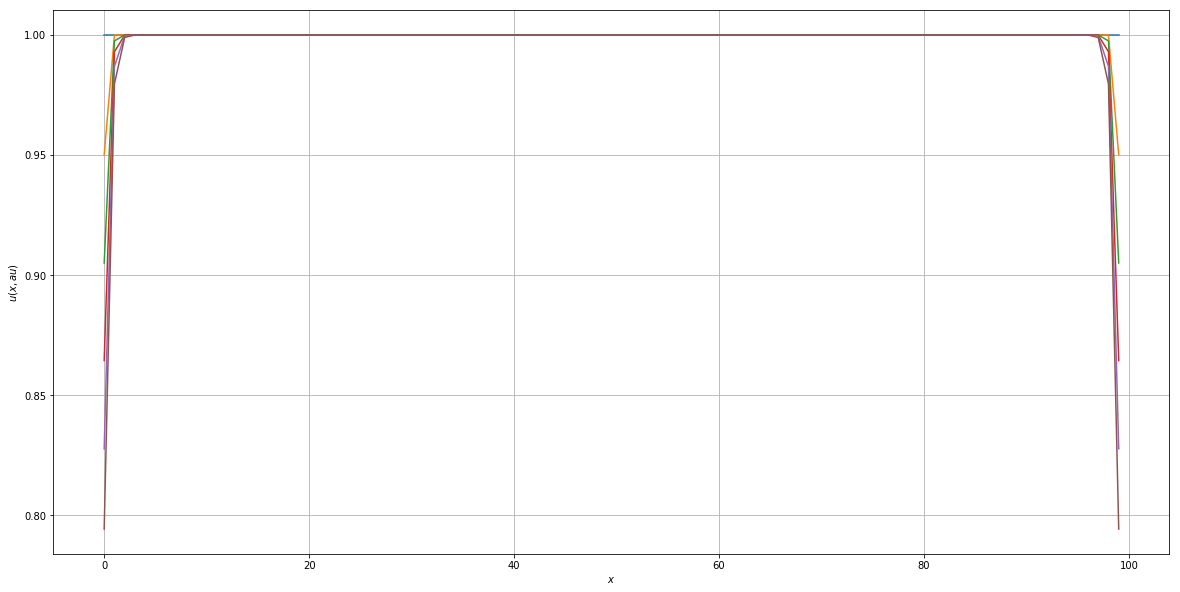

In [45]:

x, u = initialCond(N)

plt.figure(figsize=(20,10))  
plt.plot(x, u)


#how many iterations
m = 5
for j in range(m):
    
    #print('iter = %s' % (str(j)))
    
    if scheme == 'implicit':
        u = diagSolver(lL, dD, uU, u)
    elif scheme == 'explicit':
        u = np.matmul(A, u)

    plt.plot(x, u)
    plt.grid(True)
    plt.xlabel('$x$')
    plt.ylabel('$u(x,\tau$)')

plt.show()